In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [2]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    validation_split = 0.2 ,
    zoom_range=0.4 ,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    fill_mode='nearest'
    
)

image_generator_test = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
current_dir = r"C:\Users\Bastani\Desktop\trash_images"

In [4]:
train = image_generator.flow_from_directory(current_dir , class_mode='categorical', batch_size=50, subset = "training", target_size=(200, 200))

Found 2024 images belonging to 6 classes.


In [5]:
test = image_generator.flow_from_directory(current_dir , class_mode='categorical', subset = "validation", batch_size=50, target_size=(200, 200))

Found 503 images belonging to 6 classes.


In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)

array([1.04437564, 0.84123026, 1.02845528, 0.70868347, 0.87392055,
       3.06666667])

In [30]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train.classes), y=train.classes)

In [20]:
class_weights = dict(zip(np.unique(train.classes), weights))

In [31]:
class_weights

{0: 1.04437564499484,
 1: 0.8412302576891105,
 2: 1.0284552845528456,
 3: 0.7086834733893558,
 4: 0.8739205526770294,
 5: 3.066666666666667}

In [32]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)

In [33]:
mch = ModelCheckpoint('chestxray.h5', monitor='val_loss', mode='min', save_best_only=True)

In [34]:
history = model.fit(train, steps_per_epoch=len(train), epochs=30, validation_data=test, validation_steps=len(test), callbacks=[es, rlrop, mch], class_weight=class_weights)

Epoch 1/30
41/41 [==============================] - 93s 2s/step - loss: 1.7703 - accuracy: 0.1976 - val_loss: 1.5680 - val_accuracy: 0.3439 - lr: 0.0010
Epoch 2/30


c:\Users\Bastani\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 91s 2s/step - loss: 1.6140 - accuracy: 0.3202 - val_loss: 1.6102 - val_accuracy: 0.2286 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 93s 2s/step - loss: 1.5140 - accuracy: 0.3617 - val_loss: 1.4907 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 95s 2s/step - loss: 1.4714 - accuracy: 0.3839 - val_loss: 1.4643 - val_accuracy: 0.4036 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 94s 2s/step - loss: 1.4485 - accuracy: 0.4061 - val_loss: 1.4496 - val_accuracy: 0.3976 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 95s 2s/step - loss: 1.4150 - accuracy: 0.4160 - val_loss: 1.5861 - val_accuracy: 0.3280 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 91s 2s/step - loss: 1.3685 - accuracy: 0.4259 - val_loss: 1.4006 - val_accuracy: 0.4473 - lr: 0.0010
Epoch 8/30
41/41 [==============================] - 91s 2s/step - loss: 1.3335 - accuracy: 0.

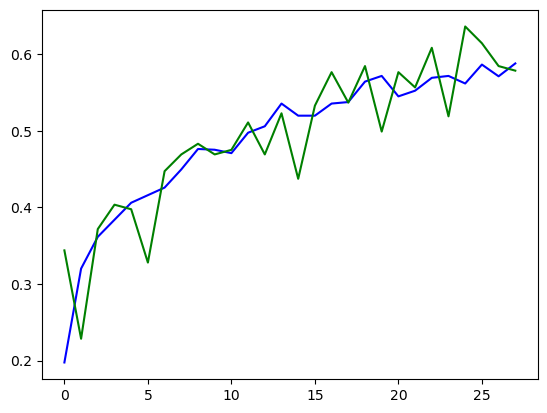

In [35]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')

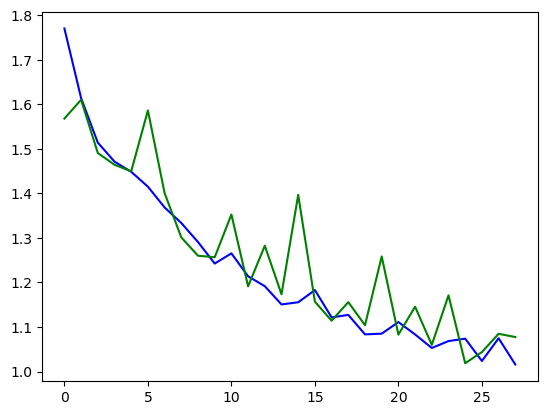

In [36]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')